# Boundary Layer Height Estimation

This script gets pulls Data (Currently GFS, Will add NARR once I figure it out) data from nomads.ncdc.noaa.gov/ via ftp over a specified date range

### It uses NCL (NCAR Command Language) https://www.ncl.ucar.edu/Download/ to convert .grib2 files to .nc4 (NetCDF4) http://unidata.github.io/netcdf4-python/#netCDF4.Variable

### Then it estimates the BL heights at your location based off the average of the (#9) closet gridpoints

487.24
datetime
2017-06-23 18:00:00    487.23999
Name: PBLH, dtype: float64
957.8
datetime
2017-06-24    957.799927
Name: PBLH, dtype: float64
199.26
datetime
2017-06-24 06:00:00    199.259995
Name: PBLH, dtype: float64
260.76
datetime
2017-06-24 12:00:00    260.759979
Name: PBLH, dtype: float64
501.04
datetime
2017-06-24 18:00:00    501.039978
Name: PBLH, dtype: float64
516.0
datetime
2017-06-25    516.0
Name: PBLH, dtype: float64
372.76
datetime
2017-06-25 06:00:00    372.76001
Name: PBLH, dtype: float64
222.48
datetime
2017-06-25 12:00:00    222.47998
Name: PBLH, dtype: float64
1592.04
datetime
2017-06-25 18:00:00    1592.040039
Name: PBLH, dtype: float64
612.28
datetime
2017-06-26    612.279968
Name: PBLH, dtype: float64
290.76
datetime
2017-06-26 06:00:00    290.76001
Name: PBLH, dtype: float64
300.76
datetime
2017-06-26 12:00:00    300.759979
Name: PBLH, dtype: float64
332.24
datetime
2017-06-26 18:00:00    332.23999
Name: PBLH, dtype: float64
327.48
datetime
2017-06-27    327.47

907.733
datetime
2017-07-21 18:00:00    907.73291
Name: PBLH, dtype: float64
940.527
datetime
2017-07-22    940.526978
Name: PBLH, dtype: float64
237.584
datetime
2017-07-22 06:00:00    237.583832
Name: PBLH, dtype: float64
130.45
datetime
2017-07-22 12:00:00    130.450455
Name: PBLH, dtype: float64
1169.37
datetime
2017-07-22 18:00:00    1169.371582
Name: PBLH, dtype: float64
439.142
datetime
2017-07-23    439.141632
Name: PBLH, dtype: float64
213.931
datetime
2017-07-23 06:00:00    213.930878
Name: PBLH, dtype: float64
248.835
datetime
2017-07-23 12:00:00    248.835037
Name: PBLH, dtype: float64
706.881
datetime
2017-07-23 18:00:00    706.881409
Name: PBLH, dtype: float64
427.38
datetime
2017-07-24    427.380096
Name: PBLH, dtype: float64
123.614
datetime
2017-07-24 06:00:00    123.6138
Name: PBLH, dtype: float64
119.755
datetime
2017-07-24 12:00:00    119.754547
Name: PBLH, dtype: float64
216.969
datetime
2017-07-24 18:00:00    216.969208
Name: PBLH, dtype: float64
394.54
datetime
2

489.941
datetime
2017-08-18    489.941498
Name: PBLH, dtype: float64
69.4345
datetime
2017-08-18 06:00:00    69.434494
Name: PBLH, dtype: float64
109.858
datetime
2017-08-18 12:00:00    109.858391
Name: PBLH, dtype: float64
417.996
datetime
2017-08-18 18:00:00    417.995544
Name: PBLH, dtype: float64
794.519
datetime
2017-08-19    794.51886
Name: PBLH, dtype: float64
22.3014
datetime
2017-08-19 06:00:00    22.30143
Name: PBLH, dtype: float64
22.5914
datetime
2017-08-19 12:00:00    22.591354
Name: PBLH, dtype: float64
471.324
datetime
2017-08-19 18:00:00    471.323853
Name: PBLH, dtype: float64
503.819
datetime
2017-08-20    503.819214
Name: PBLH, dtype: float64
200.484
datetime
2017-08-20 06:00:00    200.483673
Name: PBLH, dtype: float64
76.5422
datetime
2017-08-20 12:00:00    76.542236
Name: PBLH, dtype: float64
474.407
datetime
2017-08-20 18:00:00    474.40686
Name: PBLH, dtype: float64
631.972
datetime
2017-08-21    631.972229
Name: PBLH, dtype: float64
161.117
datetime
2017-08-21 0

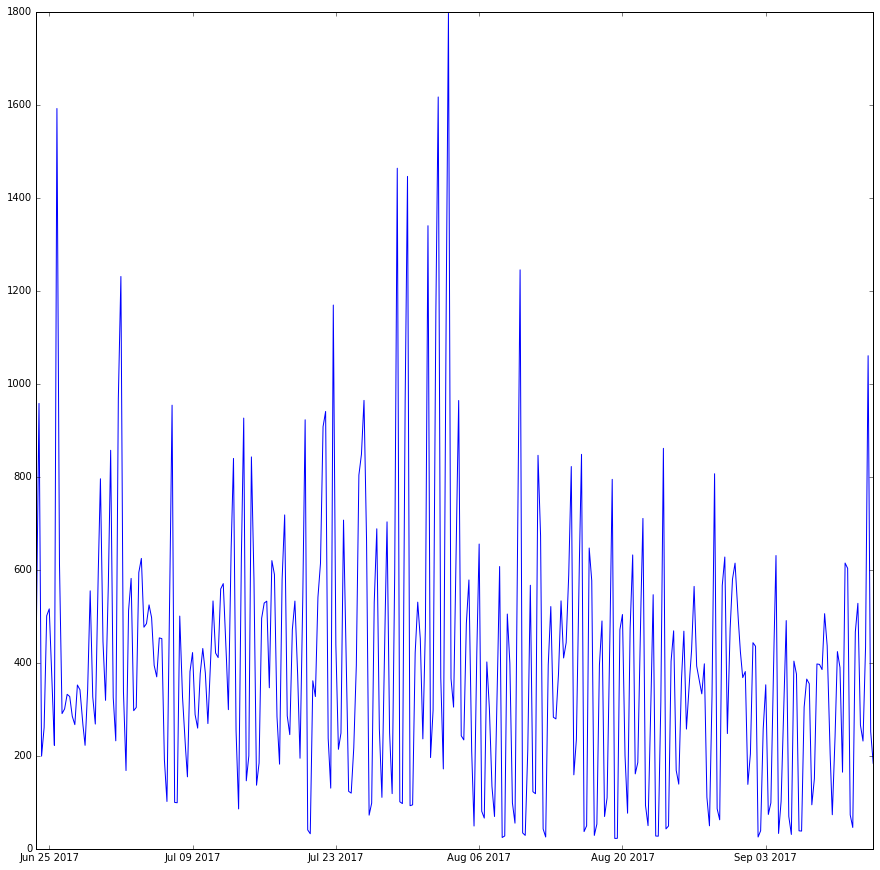

In [2]:
import pandas as pd
import numpy as np
import shlex, subprocess
import matplotlib.pyplot as plt


from netCDF4 import Dataset
ftproot = "ftp://nomads.ncdc.noaa.gov/GFS/analysis_only/"
tail = '_000.grb2'
Data_File = 'QuickData_FI.csv'
# FluxData = pd.read_csv(Data_file,delimiter = ',',header = 0)
# FluxData = FluxData.set_index(pd.DatetimeIndex(FluxData.datetime))
# FluxData['PBLH'] = -100# np.nan


Y_Lat = 69.37333333
X_Lon = -134.89000000+360

# def Extract_Data(file):
#     file = file.split('/')[-1:][0].split('.grb2')[0]+'.nc4'
#     with Dataset(file, "a") as Data:
#         print(Data.variables)
        
#         BL = Data.variables['HPBL_P0_L1_GLL0'][:]
#         TMP = Data.variables['TMP_P0_L1_GLL0'][:]
#         Lat = Data.variables['lat_0'][:]
#         Lon = Data.variables['lon_0'][:]
#     Command = "sudo rm -rf "+ file
#     args = shlex.split(Command)
#     p = subprocess.Popen(args)
#     p.wait()
#     return(BL,Lat,Lon,TMP)

# def Get_Data(file):
#     Command = """wget --user="anonymous" --password="thruhikerflash@gmail.com" """
#     Command = Command+ file
#     args = shlex.split(Command)
#     p = subprocess.Popen(args)
#     p.wait()
#     filename = file.split('/')[-1:][0]
#     Command = "ncl_convert2nc "+ filename+" -nc4c"
#     args = shlex.split(Command)
    
#     p = subprocess.Popen(args)
#     p.wait()

#     Command = "sudo rm -rf "+ filename
#     args = shlex.split(Command)
#     p = subprocess.Popen(args)
#     p.wait()
#     return(Extract_Data(file))
#     print(args)


class Get_BL:
    def __init__(self,Data_File,X_Lon,Y_Lat):
        self.XLon,self.YLat = X_Lon,Y_Lat
        self.FluxData = pd.read_csv(Data_File,delimiter = ',',header = 0)
        self.FluxData = self.FluxData.set_index(pd.DatetimeIndex(self.FluxData.datetime))
        self.FluxData['PBLH'] = np.nan
        self.File_List()
        for file,date in zip(self.Files,self.Dates):
            self.Get_Data(file,date)
        self.FluxData['PBLH'] = self.FluxData['PBLH'].interpolate()
        plt.figure(figsize = (15,15))
        plt.plot(self.FluxData.index.to_pydatetime(),self.FluxData['PBLH'])
        self.FluxData.to_csv('Quick_Data_W_BL.csv')

    def File_List(self):
        self.Files = []
        self.Dates = []
        for i in self.FluxData.index:
            ky = str(i.year)
            mo = str(i.month)
            if i.month < 10:
                mo = '0'+mo
            dy = str(i.day)
            if i.day < 10:
                dy = '0'+dy
            ky1 = ky + mo
            ky2 = ky + mo+ dy
            hr = str(i.hour)+'00'
            if i.hour < 10:
                hr = '0'+hr
            if i.hour%6 == 0:
                if i.minute == 0:
                    self.Files.append(ftproot+ky1+'/'+ky2+'/gfsanl_4_'+ky2+'_'+hr+tail)
                    self.Dates.append(i)
                
    def Get_Data(self,file,date):
        Command = """wget --user="anonymous" --password="thruhikerflash@gmail.com" """
        Command = Command+ file
        args = shlex.split(Command)
        p = subprocess.Popen(args)
        p.wait()
        filename = file.split('/')[-1:][0]
        Command = "ncl_convert2nc "+ filename+" -nc4c"
        args = shlex.split(Command)

        p = subprocess.Popen(args)
        p.wait()

        Command = "sudo rm -rf "+ filename
        args = shlex.split(Command)
        p = subprocess.Popen(args)
        p.wait()
        self.Extract_Data(file,date)
            
    def Extract_Data(self,file,date):
        file = file.split('/')[-1:][0].split('.grb2')[0]+'.nc4'
        with Dataset(file, "a") as Data:
#             print(Data.variables)

            BL = Data.variables['HPBL_P0_L1_GLL0'][:]
#             TMP = Data.variables['TMP_P0_L1_GLL0'][:]
            Lat = Data.variables['lat_0'][:]
            Lon = Data.variables['lon_0'][:]
        Command = "sudo rm -rf "+ file
        args = shlex.split(Command)
        p = subprocess.Popen(args)
        p.wait()
        XL = np.where(Lon == Lon[Lon>self.XLon].min())[0][0]
        YL = np.where(Lat == Lat[Lat>self.YLat].min())[0][0]
        print(BL[YL:YL+2,XL:XL+2].mean())
        self.FluxData.loc[self.FluxData.index == date,'PBLH'] = BL[YL:YL+2,XL:XL+2].mean()
        print(self.FluxData.loc[self.FluxData.index == date,'PBLH'])
        
            
BL = Get_BL(Data_File,X_Lon,Y_Lat)
#     else:
#         print(i)
# for Date in Dates:
#     FluxData.loc[FluxData.index == Date,'PBLH']=100
# plt.figure()
# plt.plot(FluxData['PBLH'])
# # plt.xlim(0,100)
# print(FluxData['PBLH'])
# plt.show()
# BL_Time=[]
# for f in Files[:5]:
#     BL,Lat,Lon,TMP = Get_Data(Files[-1])
#     xarr = Lon-X_Lon
#     yarr = Lat-Y_Lat

#     XL = np.where(Lon == Lon[Lon>X_Lon].min())[0][0]
#     YL = np.where(Lat == Lat[Lat>Y_Lat].min())[0][0]
#     BL_Time.append(BL[YL:YL+2,XL:XL+2].mean())
# plt.figure()
# plt.plot(np.asanyarray(BL_Time))
#     print(temp)
plt.show()

# Possibly some useful stuff here

In [ ]:
"""
plot H's and L's on a sea-level pressure map
(uses scipy.ndimage.filters and netcdf4-python)
"""
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.basemap import Basemap, addcyclic
from scipy.ndimage.filters import minimum_filter, maximum_filter
from netCDF4 import Dataset

def extrema(mat,mode='wrap',window=10):
    """find the indices of local extrema (min and max)
    in the input array."""
    mn = minimum_filter(mat, size=window, mode=mode)
    mx = maximum_filter(mat, size=window, mode=mode)
    # (mat == mx) true if pixel is equal to the local max
    # (mat == mn) true if pixel is equal to the local in
    # Return the indices of the maxima, minima
    return np.nonzero(mat == mn), np.nonzero(mat == mx)

# plot 00 UTC today.
date = datetime.now().strftime('%Y%m%d')+'00'
print(date)
date = '2017110900'

# open OpenDAP dataset.
temp = "http://nomads.ncep.noaa.gov:9090/dods/gfs/gfs/%s/gfs_%sz_anl" %\
       (date[0:8],date[8:10])
print(temp)
# "https://nomads.ncdc.noaa.gov/data/gfsanl/200403/20040310/

data=Dataset("https://nomads.ncdc.noaa.gov/data/gfsanl/200404/20040402/gfsanl_3_20040402_0000_000.grb")#"http://nomads.ncep.noaa.gov:9090/dods/gfs_0p25/gfs20171111/gfs_0p25_00z_anl")
    #"http://nomads.ncep.noaa.gov:9090/dods/gfs_0p50/gfs20171109/gfs_0p50_00z")#%\
#         (date[0:8],date[8:10]))



# read lats,lons.
lats = data.variables['lat'][:]
lons1 = data.variables['lon'][:]
print(data.variables)
nlats = len(lats)
nlons = len(lons1)
# read prmsl, convert to hPa (mb).
prmsl = 0.01*data.variables['prmslmsl'][0]
# the window parameter controls the number of highs and lows detected.
# (higher value, fewer highs and lows)
local_min, local_max = extrema(prmsl, mode='wrap', window=50)
# create Basemap instance.
m = Basemap(llcrnrlon=0,llcrnrlat=-80,urcrnrlon=360,urcrnrlat=80,projection='mill')
# add wrap-around point in longitude.
prmsl, lons = addcyclic(prmsl, lons1)
# contour levels
clevs = np.arange(900,1100.,5.)
# find x,y of map projection grid.
lons, lats = np.meshgrid(lons, lats)
x, y = m(lons, lats)
x = x.astype(int)
y = y.astype(int)
print(type(x),y)
# create figure.
fig=plt.figure(figsize=(8,4.5))
ax = fig.add_axes([0.05,0.05,0.9,0.85])
print(m)
cs = m.contour(x,y,prmsl,clevs,colors='k',linewidths=1.)
m.drawcoastlines(linewidth=1.25)
m.fillcontinents(color='0.8')
m.drawparallels(np.arange(-80,81,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])
xlows = x[local_min]; xhighs = x[local_max]
ylows = y[local_min]; yhighs = y[local_max]
lowvals = prmsl[local_min]; highvals = prmsl[local_max]
# plot lows as blue L's, with min pressure value underneath.
xyplotted = []
# don't plot if there is already a L or H within dmin meters.
yoffset = 0.022*(m.ymax-m.ymin)
dmin = yoffset
for x,y,p in zip(xlows, ylows, lowvals):
    if x < m.xmax and x > m.xmin and y < m.ymax and y > m.ymin:
        dist = [np.sqrt((x-x0)**2+(y-y0)**2) for x0,y0 in xyplotted]
        if not dist or min(dist) > dmin:
            plt.text(x,y,'L',fontsize=14,fontweight='bold',
                    ha='center',va='center',color='b')
            plt.text(x,y-yoffset,repr(int(p)),fontsize=9,
                    ha='center',va='top',color='b',
                    bbox = dict(boxstyle="square",ec='None',fc=(1,1,1,0.5)))
            xyplotted.append((x,y))
# plot highs as red H's, with max pressure value underneath.
xyplotted = []
for x,y,p in zip(xhighs, yhighs, highvals):
    if x < m.xmax and x > m.xmin and y < m.ymax and y > m.ymin:
        dist = [np.sqrt((x-x0)**2+(y-y0)**2) for x0,y0 in xyplotted]
        if not dist or min(dist) > dmin:
            plt.text(x,y,'H',fontsize=14,fontweight='bold',
                    ha='center',va='center',color='r')
            plt.text(x,y-yoffset,repr(int(p)),fontsize=9,
                    ha='center',va='top',color='r',
                    bbox = dict(boxstyle="square",ec='None',fc=(1,1,1,0.5)))
            xyplotted.append((x,y))
plt.title('Mean Sea-Level Pressure (with Highs and Lows) %s' % date)
plt.show()

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()